In [1]:
import pandas as pd
import plotly.express as px

In [2]:
us2020_url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties-2020.csv"
us2020_cases = pd.read_csv(us2020_url, usecols=['date', 'county', 'state', 'cases', 'deaths'])
us2021_url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties-2021.csv"
us2021_cases = pd.read_csv(us2021_url, usecols=['date', 'county', 'state', 'cases', 'deaths'])

In [3]:
us2022_url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties-2022.csv"
us2022_cases = pd.read_csv(us2022_url, usecols=['date', 'county', 'state', 'cases', 'deaths'])

In [4]:

recent_url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties-recent.csv"
recent_cases = pd.read_csv(recent_url, usecols=['date', 'county', 'state', 'cases', 'deaths'])

In [5]:
us2020_cases.tail()

,date,county,state,cases,deaths
884732,2020-12-31,Sweetwater,Wyoming,2966,16.0
884733,2020-12-31,Teton,Wyoming,2138,4.0
884734,2020-12-31,Uinta,Wyoming,1558,7.0
884735,2020-12-31,Washakie,Wyoming,780,19.0
884736,2020-12-31,Weston,Wyoming,476,2.0


In [6]:
us2020_cases["deaths"] = us2020_cases["deaths"].fillna(0)
us2020_cases.isna().sum()

date      0
county    0
state     0
cases     0
deaths    0
dtype: int64

In [7]:
us2021_cases.tail()

,date,county,state,cases,deaths
1185368,2021-12-31,Sweetwater,Wyoming,8320,107.0
1185369,2021-12-31,Teton,Wyoming,5950,14.0
1185370,2021-12-31,Uinta,Wyoming,4154,31.0
1185371,2021-12-31,Washakie,Wyoming,1879,37.0
1185372,2021-12-31,Weston,Wyoming,1254,14.0


In [8]:
us2021_cases["deaths"] = us2021_cases["deaths"].fillna(0)
us2021_cases.isna().sum()

date      0
county    0
state     0
cases     0
deaths    0
dtype: int64

In [9]:
us2022_cases.tail()

,date,county,state,cases,deaths
1188039,2022-12-31,Sweetwater,Wyoming,12410,136.0
1188040,2022-12-31,Teton,Wyoming,12010,16.0
1188041,2022-12-31,Uinta,Wyoming,6305,43.0
1188042,2022-12-31,Washakie,Wyoming,2721,47.0
1188043,2022-12-31,Weston,Wyoming,1880,22.0


In [10]:
us2022_cases["deaths"] = us2022_cases["deaths"].fillna(0)
us2022_cases.isna().sum()

date      0
county    0
state     0
cases     0
deaths    0
dtype: int64

In [11]:
recent_cases.tail()

,date,county,state,cases,deaths
97593,2023-01-01,Sweetwater,Wyoming,12410,136.0
97594,2023-01-01,Teton,Wyoming,12010,16.0
97595,2023-01-01,Uinta,Wyoming,6305,43.0
97596,2023-01-01,Washakie,Wyoming,2721,47.0
97597,2023-01-01,Weston,Wyoming,1880,22.0


In [12]:
recent_cases["deaths"] = recent_cases["deaths"].fillna(0)
recent_cases.isna().sum()

date      0
county    0
state     0
cases     0
deaths    0
dtype: int64

In [13]:
#Population
population = pd.read_csv("data/popest2020-2022.csv", usecols=['STATE', 'NAME', 'POPESTIMATE2020', 'POPESTIMATE2021', 'POPESTIMATE2022'])

population = population.loc[population['STATE']!=0] #FILTER TO GET STATE ONLY
population = population.drop(columns=['STATE']) #DROP STATE NUMBER
population = population.rename(columns={"POPESTIMATE2020": "2020", "POPESTIMATE2021": "2021", "POPESTIMATE2022": "2022"})

population.head()

,NAME,2020,2021,2022
14,Alabama,5031362,5049846,5074296
15,Alaska,732923,734182,733583
16,Arizona,7179943,7264877,7359197
17,Arkansas,3014195,3028122,3045637
18,California,39501653,39142991,39029342


In [64]:
#read state_code
state_code = pd.read_csv('data/state_code.csv')
state_code.tail()

,state,abbrev,code
46,Virginia,Va.,VA
47,Washington,Wash.,WA
48,West Virginia,W.Va.,WV
49,Wisconsin,Wis.,WI
50,Wyoming,Wyo.,WY


In [69]:
#merge sate ecode and population
population_code = pd.merge(population, state_code, left_on='NAME', right_on='state')
population_code = population_code.drop(['abbrev', 'state'], axis=1)
population_code.head()

,NAME,2020,2021,2022,code
0,Alabama,5031362,5049846,5074296,AL
1,Alaska,732923,734182,733583,AK
2,Arizona,7179943,7264877,7359197,AZ
3,Arkansas,3014195,3028122,3045637,AR
4,California,39501653,39142991,39029342,CA


In [70]:
# Save the DataFrame to a CSV file
population_code.to_csv('data/estimated_population.csv', index=False)


In [72]:
pop_df = pd.read_csv('data/estimated_population.csv')
pop_df.tail()

,NAME,2020,2021,2022,code
46,Virginia,8636471,8657365,8683619,VA
47,Washington,7724031,7740745,7785786,WA
48,West Virginia,1791420,1785526,1775156,WV
49,Wisconsin,5896271,5880101,5892539,WI
50,Wyoming,577605,579483,581381,WY


In [73]:
pop_df.isna().sum()

NAME    0
2020    0
2021    0
2022    0
code    0
dtype: int64

In [19]:
us2020_date = us2020_cases.groupby(["date"])[["cases","deaths"]].sum().reset_index()
us2020_state = us2020_cases.groupby(["date", "state"])[["cases","deaths"]].sum().reset_index()

us2021_date = us2021_cases.groupby(["date"])[["cases","deaths"]].sum().reset_index()
us2021_state = us2021_cases.groupby(["date", "state"])[["cases","deaths"]].sum().reset_index()

us2022_date = us2022_cases.groupby(["date"])[["cases","deaths"]].sum().reset_index()
us2022_state = us2022_cases.groupby(["date", "state"])[["cases","deaths"]].sum().reset_index()


In [20]:
us_date_df = pd.concat([us2020_date, us2021_date, us2022_date])
us_state_df = pd.concat([us2020_state, us2021_state, us2022_state])

In [21]:
us_state_df

,date,state,cases,deaths
0,2020-01-21,Washington,1,0.0
1,2020-01-22,Washington,1,0.0
2,2020-01-23,Washington,1,0.0
3,2020-01-24,Illinois,1,0.0
4,2020-01-24,Washington,1,0.0
...,...,...,...,...
20435,2022-12-31,Virginia,2205518,22793.0
20436,2022-12-31,Washington,1883676,15067.0
20437,2022-12-31,West Virginia,624721,7795.0
20438,2022-12-31,Wisconsin,1960884,15860.0


In [22]:
us_date_df ['date'] = pd.to_datetime(us_date_df['date'])
us_state_df ['date'] = pd.to_datetime(us_state_df['date'])

In [23]:
#add year column
us_state_df['year'] = us_state_df['date'].dt.year
us_date_df['year'] = us_date_df['date'].dt.year

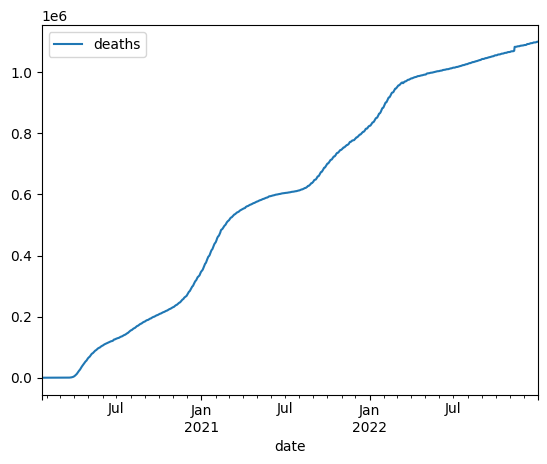

In [24]:
import matplotlib.pyplot as plt

# Select the 'Year' and 'Sales' columns
dff = us_date_df[['date', 'deaths']]

# Plot the 'Year' and 'Sales' columns
dff.plot(x='date', y='deaths')

# Show the plot
plt.show()

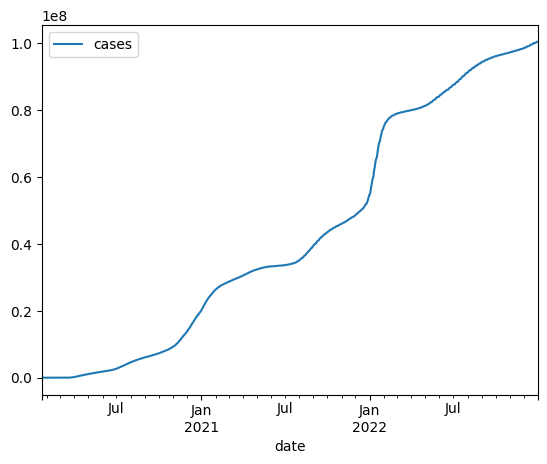

In [25]:
# Select the 'Year' and 'Sales' columns
dff = us_date_df[['date', 'cases']]

# Plot the 'Year' and 'Sales' columns
dff.plot(x='date', y='cases')

# Show the plot
plt.show()

# Data to show

In [26]:
#Last update date
last_update= us_date_df["date"].iloc[-1].strftime('%Y-%m-%d')
last_update

'2022-12-31'

In [27]:
us_date_df.tail()

,date,cases,deaths,year
360,2022-12-27,100198218,1097812.0,2022
361,2022-12-28,100321148,1098651.0,2022
362,2022-12-29,100440391,1099302.0,2022
363,2022-12-30,100473647,1099824.0,2022
364,2022-12-31,100479169,1099837.0,2022


In [28]:
#Global cases
global_cases = us_date_df["cases"].iloc[-1]
global_cases

100479169

In [29]:
#Global deaths
global_deaths = us_date_df["deaths"].iloc[-1]
global_deaths

1099837.0

In [30]:
#Global CFR
CFR = round(global_deaths/global_cases, 2)
CFR

0.01

In [31]:
#Global Attack Rate
population_2022 = pop_df['2022'].sum()
attack_rate = round(global_cases/population_2022, 2)
attack_rate


0.3

# Data by State

In [32]:
us_state_df.tail()

,date,state,cases,deaths,year
20435,2022-12-31,Virginia,2205518,22793.0,2022
20436,2022-12-31,Washington,1883676,15067.0,2022
20437,2022-12-31,West Virginia,624721,7795.0,2022
20438,2022-12-31,Wisconsin,1960884,15860.0,2022
20439,2022-12-31,Wyoming,182847,1959.0,2022


In [33]:
#filter by state
state = 'American Samoa'
df_state = us_state_df.loc[us_state_df['state']==state]


In [34]:
# state cases
state_cases = df_state["cases"].iloc[-1]
state_cases

8266

In [35]:
#state deaths
state_deaths = df_state["deaths"].iloc[-1]
state_deaths

34.0

In [36]:
#state CFR
state_CFR = round(state_deaths/state_cases, 2)
state_CFR

0.0

In [37]:
pop_df.tail()

,NAME,2020,2021,2022
47,Washington,7724031,7740745,7785786
48,West Virginia,1791420,1785526,1775156
49,Wisconsin,5896271,5880101,5892539
50,Wyoming,577605,579483,581381
51,Puerto Rico,3281557,3262693,3221789


In [44]:
#state attack rate
population_state_2022 = pop_df.loc[(pop_df['NAME'] == state),'2022']
state_attack_rate =  round(state_cases/population_state_2022, 2)
state_attack_rate


KeyError: 'Alabama'

In [39]:
us_state_df

,date,state,cases,deaths,year
0,2020-01-21,Washington,1,0.0,2020
1,2020-01-22,Washington,1,0.0,2020
2,2020-01-23,Washington,1,0.0,2020
3,2020-01-24,Illinois,1,0.0,2020
4,2020-01-24,Washington,1,0.0,2020
...,...,...,...,...,...
20435,2022-12-31,Virginia,2205518,22793.0,2022
20436,2022-12-31,Washington,1883676,15067.0,2022
20437,2022-12-31,West Virginia,624721,7795.0,2022
20438,2022-12-31,Wisconsin,1960884,15860.0,2022


In [40]:
#graph
def update_graph(state):
    df_state = us_state_df.loc[us_state_df['state']==state]
    fig = px.line(df_state , x='date', y=['cases', 'deaths'], title='Covid-19 Cases and Deaths in ' + state)
    return fig


In [41]:
update_graph(state)

In [42]:
#Options list
unique_state = us_state_df['state'].unique()
options = [{'label': value, 'value': value} for value in unique_state]
options

[{'label': 'Washington', 'value': 'Washington'},
 {'label': 'Illinois', 'value': 'Illinois'},
 {'label': 'California', 'value': 'California'},
 {'label': 'Arizona', 'value': 'Arizona'},
 {'label': 'Massachusetts', 'value': 'Massachusetts'},
 {'label': 'Wisconsin', 'value': 'Wisconsin'},
 {'label': 'Texas', 'value': 'Texas'},
 {'label': 'Nebraska', 'value': 'Nebraska'},
 {'label': 'Utah', 'value': 'Utah'},
 {'label': 'Oregon', 'value': 'Oregon'},
 {'label': 'Florida', 'value': 'Florida'},
 {'label': 'New York', 'value': 'New York'},
 {'label': 'Rhode Island', 'value': 'Rhode Island'},
 {'label': 'Georgia', 'value': 'Georgia'},
 {'label': 'New Hampshire', 'value': 'New Hampshire'},
 {'label': 'North Carolina', 'value': 'North Carolina'},
 {'label': 'New Jersey', 'value': 'New Jersey'},
 {'label': 'Colorado', 'value': 'Colorado'},
 {'label': 'Maryland', 'value': 'Maryland'},
 {'label': 'Nevada', 'value': 'Nevada'},
 {'label': 'Tennessee', 'value': 'Tennessee'},
 {'label': 'Hawaii', 'value

In [74]:
pop_df.tail()

,NAME,2020,2021,2022,code
46,Virginia,8636471,8657365,8683619,VA
47,Washington,7724031,7740745,7785786,WA
48,West Virginia,1791420,1785526,1775156,WV
49,Wisconsin,5896271,5880101,5892539,WI
50,Wyoming,577605,579483,581381,WY


In [80]:
map_df

,date,state,cases,deaths,NAME,2020,2021,2022,code
0,2022-01-01,Alabama,896614,16455.0,Alabama,5031362,5049846,5074296,AL
1,2022-01-02,Alabama,909541,16455.0,Alabama,5031362,5049846,5074296,AL
2,2022-01-03,Alabama,913603,16455.0,Alabama,5031362,5049846,5074296,AL
3,2022-01-04,Alabama,921175,16496.0,Alabama,5031362,5049846,5074296,AL
4,2022-01-05,Alabama,932250,16503.0,Alabama,5031362,5049846,5074296,AL
...,...,...,...,...,...,...,...,...,...
18610,2022-12-27,Wyoming,182847,1959.0,Wyoming,577605,579483,581381,WY
18611,2022-12-28,Wyoming,182847,1959.0,Wyoming,577605,579483,581381,WY
18612,2022-12-29,Wyoming,182847,1959.0,Wyoming,577605,579483,581381,WY
18613,2022-12-30,Wyoming,182847,1959.0,Wyoming,577605,579483,581381,WY


# Map

In [87]:
map_df = pd.merge(us2022_state, pop_df, left_on='state', right_on='NAME')
map_df = map_df[['date','code','state','cases','deaths','2022']]
map_df.rename(columns={'2022': 'population'}, inplace=True)
map_df = map_df.loc[(map_df['date']== last_update)]
map_df.head()

,date,code,state,cases,deaths,population
364,2022-12-31,AL,Alabama,1573637,21208.0,5074296
729,2022-12-31,AK,Alaska,301774,1408.0,733583
1094,2022-12-31,AZ,Arizona,2378334,32182.0,7359197
1459,2022-12-31,AR,Arkansas,985493,12703.0,3045637
1824,2022-12-31,CA,California,11826466,100865.0,39029342


In [91]:
fig = px.choropleth(
    data_frame=map_df,
    locationmode='USA-states',
    locations='code',
    scope="usa",
    color='Pct of Colonies Impacted',
    hover_data=['state', 'cases','deaths', 'population'],
    color_continuous_scale=px.colors.sequential.YlOrRd,
    labels={'Cases': 'Number of cases'},
    template='plotly_dark'
)

fig.show()

ValueError: Value of 'color' is not the name of a column in 'data_frame'. Expected one of ['date', 'code', 'state', 'cases', 'deaths', 'population'] but received: Pct of Colonies Impacted

In [57]:
# -- Import and clean data (importing csv into pandas)
# df = pd.read_csv("intro_bees.csv")
df = pd.read_csv("https://raw.githubusercontent.com/Coding-with-Adam/Dash-by-Plotly/master/Other/Dash_Introduction/intro_bees.csv")

df = df.groupby(['State', 'ANSI', 'Affected by', 'Year', 'state_code'])[['Pct of Colonies Impacted']].mean()
df.reset_index(inplace=True)
print(df[:5])


     State  ANSI Affected by  Year state_code  Pct of Colonies Impacted
0  Alabama     1     Disease  2015         AL                      0.05
1  Alabama     1     Disease  2016         AL                      1.20
2  Alabama     1     Disease  2017         AL                      2.25
3  Alabama     1     Disease  2018         AL                      1.30
4  Alabama     1     Disease  2019         AL                      1.80


In [62]:
fig = px.choropleth(
    data_frame=df,
    locationmode='USA-states',
    locations='state_code',
    scope="usa",
    color='Pct of Colonies Impacted',
    hover_data=['State', 'Pct of Colonies Impacted'],
    color_continuous_scale=px.colors.sequential.YlOrRd,
    labels={'Pct of Colonies Impacted': '% of Bee Colonies'},
    template='plotly_dark'
)

fig.show()